In [110]:
import nltk
import requests
from nltk import word_tokenize
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown as md
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SKENNEDY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SKENNEDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
def summarize_text(url='http://www.gutenberg.org/ebooks/19923.txt.utf-8',
                   text_min=5,
                   show_top=20):
    display(md(f'***Text summary {url}***'))
    text = requests.get(url).text
    tokens = word_tokenize(text)
    display(md(f'*Raw tokens found: {len(tokens):,.0f}*'))
    nltk_text = nltk.Text(tokens)
    fdist = nltk.FreqDist(nltk_text)
    display(
        pd.DataFrame.from_dict(fdist, orient='index').rename(columns={
            0: 'count'
        }).sort_values(['count'], ascending=False).head(show_top))
    fdist.plot(show_top, cumulative=True)
    display(md(f'*Cleaning text....text_min:{text_min}...*'))
    stop_words = set(stopwords.words('english'))
    filtered_text = ' '.join(
        [w for w in nltk_text if not w in stop_words and len(w) > text_min])
    tokens_filtered = word_tokenize(filtered_text)
    display(md(f'*Filtered tokens found: {len(tokens_filtered):,.0f}*'))
    nltk_text_filtered = nltk.Text(tokens_filtered)
    fdist_filtered = nltk.FreqDist(nltk_text_filtered)
    display(
        pd.DataFrame.from_dict(fdist_filtered,
                               orient='index').rename(columns={
                                   0: 'count'
                               }).sort_values(['count'],
                                              ascending=False).head(show_top))
    fdist_filtered.plot(show_top, cumulative=True)
    

***Text summary http://www.gutenberg.org/ebooks/19923.txt.utf-8***

*Raw tokens found: 154,287*

,count
",",12326
the,7642
of,4418
.,4410
and,4094
to,2859
a,2148
in,2136
;,1829
that,1319


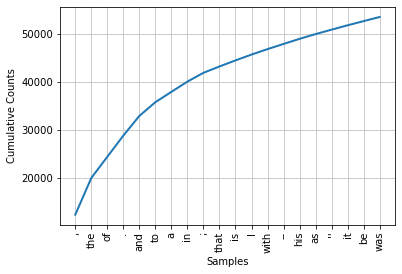

*Cleaning text....text_min:5...*

*Filtered tokens found: 34,187*

,count
.,139
without,103
little,100
Project,83
though,82
thought,81
nothing,76
things,71
utterance,70
country,68


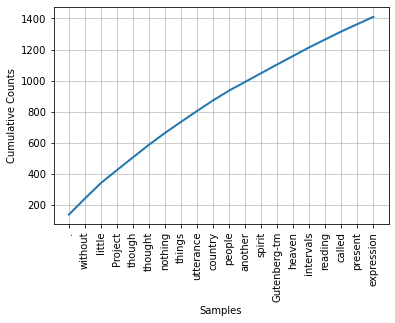

In [112]:
summarize_text()

In [27]:
text_hs = requests.get('http://www.gutenberg.org/ebooks/19923.txt.utf-8').text

In [28]:
tokens_hs = word_tokenize(text_hs)

In [29]:
len(tokens_hs)

154287

In [30]:
text_hs = nltk.Text(tokens_hs)

In [31]:
text_hs.collocations()

Project Gutenberg-tm; _Sir Pet._; _Lady Teaz._; Grand Master; Project
Gutenberg; Mr. Winkle; Mr. Pickwick; Uncle Tim; Literary Archive;
Gutenberg-tm electronic; Archive Foundation; Sir Peter; Gutenberg
Literary; electronic works; United States; Dr. Johnson; Lady Teazle;
David Swan; _Lady Sneer._; _Sir Ben._


In [32]:
text_hs[200:500]

[',',
 'by',
 'the_',
 'MINISTER',
 'OF',
 'EDUCATION',
 '_for',
 'Ontario',
 ',',
 'in',
 'the',
 'Office',
 'of',
 'the',
 'Minister',
 'of',
 'Agriculture._',
 'PRINTED',
 'AND',
 'BOUND',
 'BY',
 'HUNTER',
 ',',
 'ROSE',
 '&',
 'CO.',
 ',',
 'TORONTO',
 '.',
 'PREFACE',
 '.',
 'The',
 'selections',
 'in',
 'the',
 'HIGH',
 'SCHOOL',
 'READER',
 'have',
 'been',
 'chosen',
 'with',
 'the',
 'belief',
 'that',
 'to',
 'pupils',
 'of',
 'such',
 'advancement',
 'as',
 'is',
 'required',
 'for',
 'entrance',
 'into',
 'High',
 'Schools',
 'and',
 'Collegiate',
 'Institutes',
 ',',
 'oral',
 'reading',
 'should',
 'be',
 'taught',
 'from',
 'the',
 'best',
 'literature',
 ',',
 'inasmuch',
 'as',
 'it',
 'not',
 'only',
 'affords',
 'a',
 'wide',
 'range',
 'of',
 'thought',
 'and',
 'sentiment',
 ',',
 'but',
 'it',
 'also',
 'demands',
 'for',
 'its',
 'appropriate',
 'vocal',
 'interpretation',
 'such',
 'powers',
 'of',
 'sympathy',
 'and',
 'appreciation',
 'as',
 'are',
 'develope

In [33]:
fdist_hs = nltk.FreqDist(text_hs)

In [34]:
fdist_hs.most_common(50)

[(',', 12326),
 ('the', 7642),
 ('of', 4418),
 ('.', 4410),
 ('and', 4094),
 ('to', 2859),
 ('a', 2148),
 ('in', 2136),
 (';', 1829),
 ('that', 1319),
 ('is', 1264),
 ('I', 1215),
 ('with', 1135),
 ('--', 1077),
 ('his', 1063),
 ('as', 991),
 ("''", 922),
 ('it', 910),
 ('be', 867),
 ('was', 859),
 ('!', 850),
 ('``', 834),
 ('for', 826),
 ('he', 780),
 ('not', 770),
 ('The', 734),
 ('or', 712),
 ('And', 683),
 ('by', 663),
 ('which', 636),
 ("'d", 625),
 ("'s", 620),
 (':', 583),
 ('their', 573),
 ('they', 572),
 ('all', 570),
 ('on', 568),
 ('from', 562),
 ('you', 552),
 ('have', 551),
 ('my', 529),
 ('but', 514),
 ('this', 511),
 ('are', 507),
 ('?', 484),
 ('at', 476),
 ('had', 430),
 ('her', 383),
 ('so', 375),
 ('him', 360)]

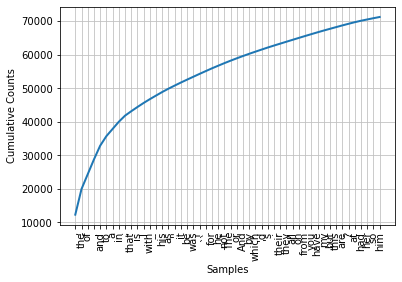

In [35]:
fdist_hs.plot(50, cumulative=True)

In [77]:
filtered_hs = [w for w in text_hs if not w in stop_words and len(w) > 5]  

In [78]:
text_hs = ' '.join([x for x in filtered_hs])

In [79]:
tokens_hs = word_tokenize(text_hs)

In [80]:
len(tokens_hs)

33936

In [81]:
text_hs = nltk.Text(tokens_hs)

In [82]:
fdist_hs = nltk.FreqDist(text_hs)

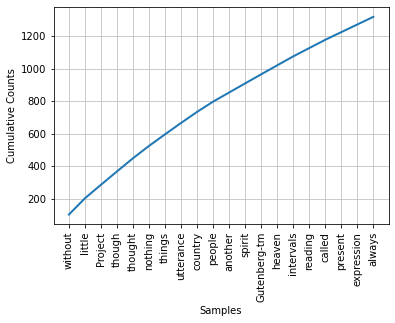

In [115]:
fdist_hs.plot(20, cumulative=True)

In [114]:
pd.DataFrame.from_dict(fdist_hs, orient='index').rename(columns={
    0: 'count'
}).sort_values(['count'], ascending=False).head(20)

,count
without,103
little,100
Project,83
though,82
thought,81
nothing,76
things,71
utterance,70
country,68
people,63
